In [65]:

import os
import pandas as pd
directory = 'C:\\Users\\admin-magstadt\\Desktop\\surv_fireprogression\\'
file_list = os.listdir(directory)

dfs = []

for file in file_list:
    file_path = os.path.join(directory, file)
    df = pd.read_csv(file_path)  # Adjust this line if your files are in a different format
    dfs.append(df)

    
df = pd.concat(dfs, ignore_index=True)
df

,t,fireid,geometry,farea,farea_change,Latitude,Longitude,farea_change_shifted,n_pixels,n_newpixel,...,GFLUX,CNWAT,FRICV,RH,DPT,SPFH,POT,UGRD,VGRD,VGTYP
0,2021-07-14,F10000,POINT (-107.21093921086862 45.56755389092402),0.426905,0.000000,45.567554,-107.210939,1.513401,3,3,...,-20.0,0.0,0.090027,74.3125,282.5,0.00827,296.5,0.485352,1.141602,10.0
1,2021-07-15,F10000,POINT (-107.19890876328742 45.567556482370605),1.940307,1.513401,45.567556,-107.198909,2.246030,9,3,...,-30.0,0.0,0.049988,51.1875,282.25,0.00808,300.75,1.12793,1.707031,10.0
2,2021-07-26,F10000,POINT (-107.19459496327504 45.56846730371504),4.186337,2.246030,45.568467,-107.194595,0.000000,12,0,...,-4.0,0.0,0.330078,29.0,275.75,0.00518,303.5,3.738281,2.488281,10.0
3,2021-07-27,F10000,POINT (-107.19459496327504 45.56846730371504),4.186337,0.000000,45.568467,-107.194595,0.000000,12,0,...,-3.0,0.0,0.059998,32.40625,277.75,0.005981,302.75,-0.711914,2.417969,10.0
4,2021-07-28,F10000,POINT (-107.19459496327504 45.56846730371504),4.186337,0.000000,45.568467,-107.194595,0.000000,12,0,...,13.0,0.0,0.029999,25.59375,277.75,0.005959,307.5,1.575195,0.455078,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41705,2020-08-07,F9997,POINT (-116.24799723384398 42.7314573827208),4.455437,0.000000,42.731457,-116.247997,0.000000,26,0,...,77.0,0.0,0.109985,51.09375,276.25,0.00555,298.25,1.891602,-0.539551,10.0
41706,2020-08-08,F9997,POINT (-116.24799723384398 42.7314573827208),4.455437,0.000000,42.731457,-116.247997,0.000000,26,0,...,62.0,0.0,0.070007,21.59375,269.5,0.003389,300.0,2.414062,1.40625,10.0
41707,2020-08-09,F9997,POINT (-116.24799723384398 42.7314573827208),4.455437,0.000000,42.731457,-116.247997,0.000000,26,0,...,50.0,0.0,0.199951,43.8125,278.5,0.006481,302.25,3.386719,1.318359,10.0
41708,2020-08-10,F9997,POINT (-116.24799723384398 42.7314573827208),4.455437,0.000000,42.731457,-116.247997,0.000000,26,0,...,49.0,0.0,0.25,31.59375,274.75,0.004929,303.25,3.833984,1.620117,10.0


In [66]:
import pandas as pd

# Assuming you already have the DataFrame 'df' with the data you provided

# Create a new column 'farea_change_shifted_gt_0' based on the condition
df['farea_change_shifted_gt_0'] = df['farea_change_shifted'].apply(lambda x: 1 if x > 0.001 else 0)

# Create a new column 'duration' to reset to 1 when 'farea_change_shifted_gt_0' changes within each 'fireid' group
df['duration'] = df.groupby(['fireid', (df['farea_change_shifted_gt_0'] != df['farea_change_shifted_gt_0'].shift()).cumsum()])['farea_change_shifted_gt_0'].cumcount() + 1

# Display the DataFrame to see the changes
print(df)


                t  fireid                                        geometry  \
0      2021-07-14  F10000   POINT (-107.21093921086862 45.56755389092402)   
1      2021-07-15  F10000  POINT (-107.19890876328742 45.567556482370605)   
2      2021-07-26  F10000   POINT (-107.19459496327504 45.56846730371504)   
3      2021-07-27  F10000   POINT (-107.19459496327504 45.56846730371504)   
4      2021-07-28  F10000   POINT (-107.19459496327504 45.56846730371504)   
...           ...     ...                                             ...   
41705  2020-08-07   F9997    POINT (-116.24799723384398 42.7314573827208)   
41706  2020-08-08   F9997    POINT (-116.24799723384398 42.7314573827208)   
41707  2020-08-09   F9997    POINT (-116.24799723384398 42.7314573827208)   
41708  2020-08-10   F9997    POINT (-116.24799723384398 42.7314573827208)   
41709  2020-08-11   F9997    POINT (-116.24799723384398 42.7314573827208)   

          farea  farea_change   Latitude   Longitude  farea_change_shifted 

In [75]:
# Replace 'NOTAVAILABLE' with NaN (optional, if needed)
df.replace('NOTAVAILABLE', pd.NA, inplace=True)

# Drop rows with 'NOTAVAILABLE' in any column
df.dropna(axis=0, how='any', inplace=True)

In [67]:
# Assuming you already have the DataFrame 'df' with the data and the 'duration' column as described

# Define the path to save the Excel file
output_path = 'C:\\Users\\admin-magstadt\\Desktop\\temp_7_27\\test.xlsx'

# Save the DataFrame to Excel
df.to_excel(output_path, index=False)

print("DataFrame has been saved to Excel successfully.")


DataFrame has been saved to Excel successfully.


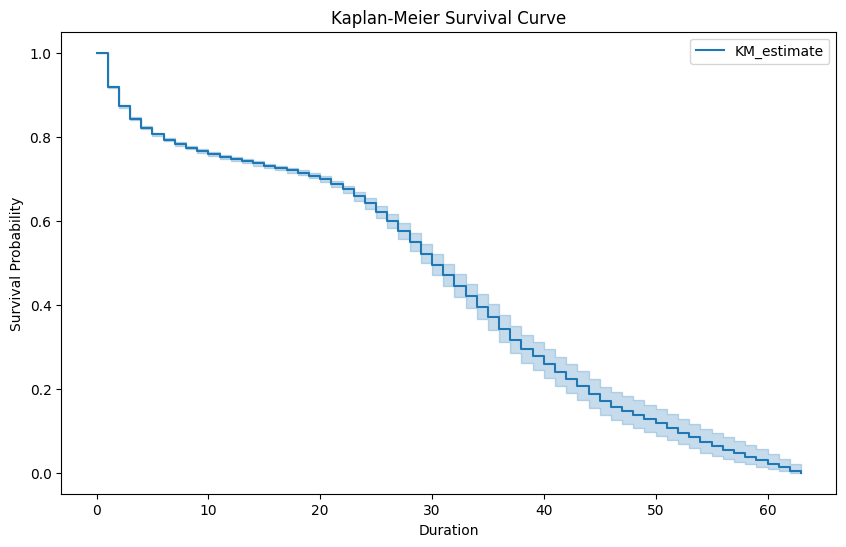

In [76]:
import pandas as pd
from lifelines import KaplanMeierFitter

# Assuming you already have the DataFrame 'df' with the data you provided

# # Create a new column 'farea_change_shifted_gt_0' based on the condition
# df['farea_change_shifted_gt_0'] = df['farea_change_shifted'].apply(lambda x: 1 if x > 0.001 else 0)

# # Create a new column 'duration' using cumcount to calculate the running total
# df['duration'] = df.groupby(['fireid', 'farea_change_shifted', 'farea'])['farea_change_shifted'].cumcount() + 1

# Perform survival analysis
kmf = KaplanMeierFitter()
kmf.fit(df['duration'], event_observed=df['farea_change_shifted_gt_0'])

# Display the Kaplan-Meier survival curve
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
kmf.plot()
plt.title('Kaplan-Meier Survival Curve')
plt.xlabel('Duration')
plt.ylabel('Survival Probability')
plt.show()



               coef  exp(coef)  se(coef)  coef lower 95%  coef upper 95%  \
covariate                                                                  
GUST      -0.017381   0.982770  0.003564       -0.024365       -0.010396   
TMP        0.014497   1.014603  0.003078        0.008465        0.020529   
RH        -0.008619   0.991418  0.000996       -0.010571       -0.006667   
DPT        0.012082   1.012155  0.003480        0.005260        0.018903   
POT        0.010635   1.010692  0.001756        0.007194        0.014076   
UGRD       0.019448   1.019639  0.004250        0.011119        0.027778   
VGRD      -0.022125   0.978118  0.004179       -0.030316       -0.013934   
VGTYP     -0.050937   0.950338  0.002928       -0.056676       -0.045199   

           exp(coef) lower 95%  exp(coef) upper 95%  cmp to          z  \
covariate                                                                
GUST                  0.975929             0.989658     0.0  -4.876991   
TMP              

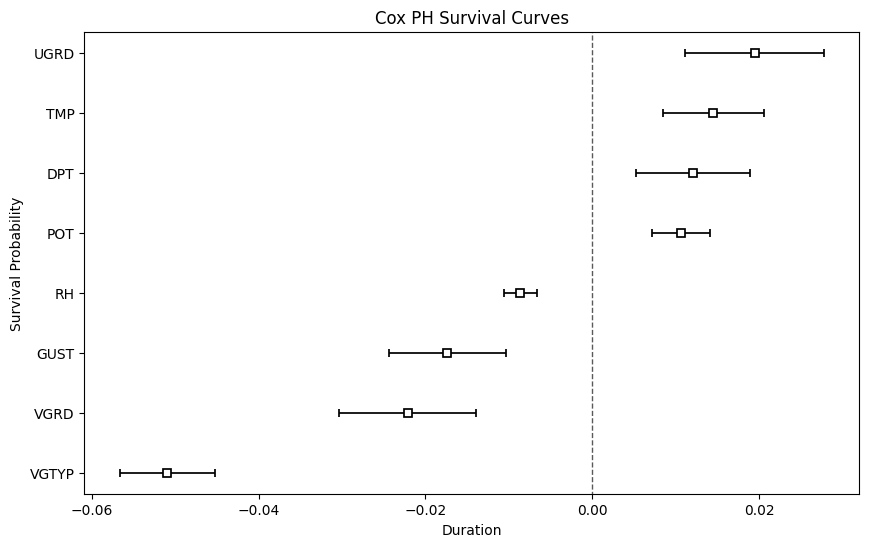

In [89]:
from lifelines import CoxPHFitter

# Create a new DataFrame with relevant columns for the Cox PH model
#cox_df = df[['duration', 'farea_change_shifted_gt_0', 'GUST', 'TMP','SFCR','GFLUX',
#             'CNWAT','FRICV','RH','DPT','POT','UGRD','VGRD','VGTYP']].copy()#,'SPFH'
cox_df = df[['duration', 'farea_change_shifted_gt_0', 'GUST', 'TMP','RH','DPT','POT','UGRD','VGRD','VGTYP']].copy()#,'SPFH'
# Drop duplicate rows, if any
#cox_df.drop_duplicates(subset=[ 'GUST', 'TMP'], keep='last', inplace=True)

# Fit the Cox PH model
cph = CoxPHFitter()
cph.fit(cox_df, duration_col='duration', event_col='farea_change_shifted_gt_0')

# Display the summary of the model's coefficients
print(cph.summary)

# Plot the survival curves for different groups based on covariates (if desired)
plt.figure(figsize=(10, 6))
cph.plot()
plt.title('Cox PH Survival Curves')
plt.xlabel('Duration')
plt.ylabel('Survival Probability')
plt.show()
